<style>
.rendered_html * + ul {
	margin-top: 0.5em;
}
    div.text_cell_render {
    padding: 0.0em 0.0em 0.0em 0.0em;
}
    .reveal p {
    margin: 20px 10;
    line-height: 1.3;
}
    html, body, .reveal div, .reveal span, .reveal applet, .reveal object, .reveal iframe, .reveal h1, .reveal h2, .reveal h3, .reveal h4, .reveal h5, .reveal h6, .reveal p, .reveal blockquote, .reveal pre, .reveal a, .reveal abbr, .reveal acronym, .reveal address, .reveal big, .reveal cite, .reveal code, .reveal del, .reveal dfn, .reveal em, .reveal img, .reveal ins, .reveal kbd, .reveal q, .reveal s, .reveal samp, .reveal small, .reveal strike, .reveal strong, .reveal sub, .reveal sup, .reveal tt, .reveal var, .reveal b, .reveal u, .reveal center, .reveal dl, .reveal dt, .reveal dd, .reveal ol, .reveal ul, .reveal li, .reveal fieldset, .reveal form, .reveal label, .reveal legend, .reveal table, .reveal caption, .reveal tbody, .reveal tfoot, .reveal thead, .reveal tr, .reveal th, .reveal td, .reveal article, .reveal aside, .reveal canvas, .reveal details, .reveal embed, .reveal figure, .reveal figcaption, .reveal footer, .reveal header, .reveal hgroup, .reveal menu, .reveal nav, .reveal output, .reveal ruby, .reveal section, .reveal summary, .reveal time, .reveal mark, .reveal audio, .reveal video {
    margin-bottom: -1px;
}
    div.text_cell_render {
    padding: 0em 0em 0.5em 0.0em;
}
</style>

# Session 3: Data Structuring in Pandas II

*Joachim Kahr Rasmussen*

# Recap (I/II)

*How does Pandas help us with data analysis?*


Along countless dimensions. Clear advantages over standard python and numpy are:
- Data representation: Allows naming columns (and rows), making it much easier to navigate in large sets of data
- Features and speed: Lots of functions and methods that are both *simple* and *fast* to apply
- Method chaining: We can write something fairly complicated in just a few lines

*What are the standard types of data that we work with?*


- Boolean data (binary true/false variables): Often used for row selection (Boolean indexing)
- Strings: Data consisting of *alphanumeric* characters. Many types of operations possible with pandas.
- Numeric variables in general:
    - Lots of built in methods for analysis (`describe`, `cut` and much, much more)

# Recap (II/II)

*What were more advanced types of data that are handled natively?*


- Categorical data: Numeric data that can only take a (often strictly) limited number of values.
- Time Series: Data that has an explicit time dimension (a *time stamp* so to say).

*What do we do, when we want to make many operations on the same time?*

- Method chaining: Allows you to make multiple operations on a dataframe in one line.
- Remember to make your code readable: Often difficult to return to / take over code that is not annotated.

# Questions from Yesterday

I have tried to gather some questions that seemed to address more general issues:
- Dictionaries in multiple layers
- Naming index keys
- Method chaining

## Dictionaries in Multiple Layers

In the exercises, you encountered a problem with navigating in dictionaries with multiple layers. Why are these interesting?
- It clearly illustrates how dictionaries are (not) related in structure
    - DataFrames have a matrix-like (2D) structure
    - Dictionaries have a non-sequential, 1D structure
    - In order to represent a df-like object with dictionaries, we must combine them in multiple layers
- Data that come in the form of JSON will often have this structure
    - Potentially in many more layers

In [22]:
my_dict1 = {0: 432, 1: 654, 2: 776 , 3: 234, 4: 765}
my_dict2 = {0: 131, 1: 432, 2: 876 , 3: 432, 4: 174}
my_dict3 = {0: 222, 1: 654, 2: 23 , 3: 862, 4: 175}

my_d = {"first": my_dict1, "second": my_dict2, "third": my_dict3}

print(my_d)

my_d['first'][2]

{'first': {0: 432, 1: 654, 2: 776, 3: 234, 4: 765}, 'second': {0: 131, 1: 432, 2: 876, 3: 432, 4: 174}, 'third': {0: 222, 1: 654, 2: 23, 3: 862, 4: 175}}


776

## Naming Columns and Rows

We can name columns. And we can name rows. Both are easy:

In [23]:
import numpy as np
import pandas as pd

my_df = pd.DataFrame(np.arange(9).reshape(3,3))
my_df

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8


In [24]:
cols = []
rows = []
[rows.append(f'row{i + 1}') for i in range(3)] # you can also write ('row{a}'.format(a=i+1))
[cols.append('column'+str(i+1)) for i in range(3)]
             
my_df.columns, my_df.index = cols, rows
my_df

,column1,column2,column3
row1,0,1,2
row2,3,4,5
row3,6,7,8


## Method Chaining

Make multiple operations in one line! Be careful that your code remains readible...

In [25]:
my_df_new = my_df\
                .rename(columns = {'column1': 'COL100', 'column2': 'COL200', 'column3': 'COL300'})\
                .assign(my_sum = lambda my_df: my_df['COL100']*100+my_df['COL200']*10+my_df['COL300'])\
                .sort_values(by='my_sum', ascending = False)\
                .reset_index(drop=True)
my_df_new

,COL100,COL200,COL300,my_sum
0,6,7,8,678
1,3,4,5,345
2,0,1,2,12


What did that lambda function just do? Essentially, the idea is that it is a function that takes $\textbf{x}$ as input:

In [26]:
func = lambda x1, x2, x3: x1+x2-2*x3
func(1,2,3)

-3

`.assign()` is then a method that creates a new column...

## Other Questions?

Come to me after this presentation...

# Today: More Structuring...

In practice, you are rarely handed some data that are just ready for analysis. In particular, it may suffer from:

- Presence of missings and/or duplicated values:
    - missing: Should we ignore? delete? replace (impute)? collect new data?
        - Depends on the context!
    - duplicated: Are they present? Should they be removed?
        - Depends on the context!

- Your data comes in separate portions that must be combined:
    - Vertical merge? Horizontal merge?
    - Inner or outer merge? On which keys?

- Your data may have the different shape:
    - What is a long format and a wide format?
    - How to shift between the two?

- You may need some aggregate pieces of information on different subgroups?
    - How to group-specific means, medians, variances, etc?

## Associated Readings

\[PDA, chapter 7: Revisited... \]

PDA, chapter 8:
- Hierarchical indexing
- Combining and merging data
- Reshaping your data

PDA, chapter 10:
- Introducing `groupby` for data aggregation
- Different ways of undertaking data aggregation
- Introducing the *split-apply-combine*-method

Wickham (2011) \[optional\]:
- Another perspective on the *split-apply-combine*-method for data analysis
- Technical, _R_-based.

## Videos and Exercises

Now proceed to the notebook with videos and exercises, where you will learn more about `pandas` and how to structure your data. In particular, you will be covering:

1. Missings and Duplicated Data:
    - Handling Missings: Delete or Interpolate?
    - Spotting and Interpreting Duplicates
2. Combining Data Sets:
    - Intro to `merge`, `concat` and `join`
    - Horizontal and Vertical Merging
3. Split-Apply-Combine
    - Finding Means and Other Characteristics from Data Subsets
4. Rehaping Data
    - Wide and Long Data
    - Intro to `stack`

*But I'm nowhere near finished with module 2 :( ...*

Don't worry. You have lot's of time to continue today and catch up later this week!

Solutions will also be up eventually...

# VIDEO 3.1: Missing Data

## Loading Stuff

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns

tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')

## Representation of Missing Data
*How can we think about missing data?*

Missing data, i.e. empty observations:
- In Python: `None`
- In pandas: numpy's 'not a number' abbreviated with `NaN` or simply `nan`

## Missing Data in Pandas
*What does a DataFrame with missing data look like*

In [28]:
nan_data = [[0,np.nan,1],\
            [2,3,None],\
            [4,5,6]]

nan_df = pd.DataFrame(nan_data, columns = ['A', 'B', 'C'])
nan_df

,A,B,C
0,0,NaN,1.0
1,2,3.0,NaN
2,4,5.0,6.0


In [29]:
nan_df.isnull()

,A,B,C
0,False,True,False
1,False,False,True
2,False,False,False


## Creating Missings (I/II)

*Would we ever want to create missings?*

In the ideal world, no. In practice, yes:
- Sometimes, missings are coded to a numerical value.
- These can be very influential in your data analysis if not uncoverred.

Example:

In [30]:
nan_data2 = [[0,999999,1],\
            [2,3,999999],\
            [4,5,6]]

pd.DataFrame(nan_data2, columns = ['A', 'B', 'C'])

,A,B,C
0,0,999999,1
1,2,3,999999
2,4,5,6


## Creating Missings (II/II)

The solutions is simple:

In [31]:
pd.DataFrame(nan_data2, columns = ['A', 'B', 'C']).replace(999999,np.NaN)

,A,B,C
0,0,NaN,1.0
1,2,3.0,NaN
2,4,5.0,6.0


## Imputing Missings
*Are there ways to replace missings with values with pandas?*

As mentioned earlier, pandas does handle missings directly. See table 7-2 in PDA. Examples:

In [32]:
nan_df.fillna(method='bfill') # can also use 'ffill'

,A,B,C
0,0,3.0,1.0
1,2,3.0,6.0
2,4,5.0,6.0


In [33]:
nan_df.fillna(nan_df.mean())

,A,B,C
0,0,4.0,1.0
1,2,3.0,3.5
2,4,5.0,6.0


*Note:* You want to be careful with this!

## Dropping Missings
*Are there also ways to simply drop missings with pandas?*

Yes, this is fortunately easy. Use the `.dropna()` feature in pandas:
- Remember to drop along the right axis.

In [34]:
nan_df.dropna(axis=0) # , thresh=2

,A,B,C
2,4,5.0,6.0


In [35]:
nan_df.dropna(axis=1)

,A
0,0
1,2
2,4


*Note:* For practical purposes, you risk dropping too many observations here!

# VIDEO 3.2: Duplicated Data

## Duplicates: A Definition
*What does it mean that there are duplicates in the data?*

Slightly tricky to define:
- More than one entry where there should in fact be only one.
- If for a certain set of variables, a combination is repeated.

In practice, it requires some understanding of your data:
- Two observations are identical: Is this a duplicate, or is it truly because 'occurance happened twice'?
- In income registries from DK: One individual should not show up more than once per year in the data.

## Handling Duplicates (I/II)
*In practice, what could a duplicate look like?*

Let's revisit our categorical education data:

In [36]:
edu_list = ['BSc Political Science', 'Secondary School'] + ['High School']*2
edu_cats = ['Secondary School', 'High School', 'BSc Political Science']
str_ser = pd.Series(edu_list*10**5)

str_ser.head(5)

0    BSc Political Science
1         Secondary School
2              High School
3              High School
4    BSc Political Science
dtype: object

Now, let's see what is duplicated:

In [37]:
str_ser.duplicated().head(5) # can also specify: ", keep='last'"

0    False
1    False
2    False
3     True
4     True
dtype: bool

## Handling Duplicates (II/II)
*How do we drop duplicates?*

Simply use the `.drop_duplicates()` method.

In [38]:
str_ser.drop_duplicates()

0    BSc Political Science
1         Secondary School
2              High School
dtype: object

## Multiple Variables (I/II)
*How do we drop duplicates when we have multiple variables (e.g. persons and years)?*

Simulate an additional binary variable for purposes of illustration:

In [39]:
edu_df = pd.DataFrame({'edu': edu_list*10**5, 'num': np.round(np.random.rand(4*10**5),0)})
edu_df.head(10)

,edu,num
0,BSc Political Science,1.0
1,Secondary School,1.0
2,High School,1.0
3,High School,1.0
4,BSc Political Science,0.0
5,Secondary School,0.0
6,High School,0.0
7,High School,1.0
8,BSc Political Science,0.0
9,Secondary School,1.0


## Multiple Variables (II/II)
Now, specify the combination of columns for which we require unique values when dropping:

In [40]:
edu_df.drop_duplicates(['edu', 'num'], keep='first')

,edu,num
0,BSc Political Science,1.0
1,Secondary School,1.0
2,High School,1.0
4,BSc Political Science,0.0
5,Secondary School,0.0
6,High School,0.0


# VIDEO 3.3: Joining DataFrames

## Joining DataFrames

Until now, we've worked with one DataFrame at a time:
- with the exception of `concat` in Assignment 0

We will now learn to put them together.

For the following, we use the multi column display from Jake van der Plaas [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html).

In [41]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)


## Some DataFrames
Let's make some data to play with. Here, use `dict` approach:

In [42]:
left = pd.DataFrame({'key': ['A', 'B', 'C', 'D'], 'value_left': range(4)})    
right = pd.DataFrame({'key': ['C', 'D', 'E', 'F'], 'value_right': range(4,8)})
display('left', 'right')

,key,value_left
0,A,0
1,B,1
2,C,2
3,D,3
,key,value_right
0,C,4
1,D,5
2,E,6
3,F,7


## Merging Data
The forthcoming figures all follow this convention:

-  <font color="blue">blue</font>: rows in merge output
-  <font color="red">red</font>: rows excluded from output (i.e., removed)
-  <font color="green">green</font>: missing values replaced with NaNs 

We use `merge` which is pandas function and a method for dataframes.

## Inner Merge (default)
This merge only uses only *shared* keys

In [43]:
inner_merge = pd.merge(left, right, on='key', how='inner')
inner_merge

,key,value_left,value_right
0,C,2,4
1,D,3,5


<center><img src='https://i.stack.imgur.com/YvuOa.png' alt="Drawing" style="width: 400px;"/></center>

## Left Merge
This merge uses only *left* keys

In [44]:
left_merge = pd.merge(left, right, on='key', how='left')
left_merge

,key,value_left,value_right
0,A,0,NaN
1,B,1,NaN
2,C,2,4.0
3,D,3,5.0


<center><img src='https://i.stack.imgur.com/BECid.png' alt="Drawing" style="width: 400px;"/></center>

## Right Merge
This merge uses only *right* keys (pretty redundant...)

In [45]:
right_merge = pd.merge(left, right, on='key', how='right')
right_merge

,key,value_left,value_right
0,C,2.0,4
1,D,3.0,5
2,E,NaN,6
3,F,NaN,7


<center><img src='https://i.stack.imgur.com/8w1US.png' alt="Drawing" style="width: 400px;"/></center>

## Outer Merge
This merge uses *all* keys

In [46]:
outer_merge = pd.merge(left, right, on='key', how='outer')
outer_merge

,key,value_left,value_right
0,A,0.0,NaN
1,B,1.0,NaN
2,C,2.0,4.0
3,D,3.0,5.0
4,E,NaN,6.0
5,F,NaN,7.0


<center><img src='https://i.stack.imgur.com/euLoe.png' alt="Drawing" style="width: 400px;"/></center>

## Overview of Merge Types

<center><img src='https://www.dofactory.com/Images/sql/sql-joins.png' alt="Drawing" style="width: 450px;"/></center>

More merge type exists, see [this post](https://stackoverflow.com/questions/53645882/pandas-merging-101) for details.

## Joining DataFrames

We can also join by keys in the index. This is possible with `join` or `concat`.

Additional properties of `concat`:
- works vertically and horizontally.
- works with multiple DataFrames at once;

Requirement: overlapping index keys or column names.

In [47]:
df0 = left.set_index('key')
df1 = right.set_index('key')

## Horizontal Join 

Works like `merge` where _key_ is now the index! 

In [48]:
inner_data = df0.join(df1, how='inner')
inner_data

,value_left,value_right
key,,
C,2,4
D,3,5


## Horizontal Join, Axis = 1

`concat` on axis=1 acts similar to a outer join.

In [49]:
dfs = [df0, df1]
pd.concat(dfs, axis=1, sort=False)

,value_left,value_right
key,,
A,0.0,NaN
B,1.0,NaN
C,2.0,4.0
D,3.0,5.0
E,NaN,6.0
F,NaN,7.0


## Vertical Join, Axis = 0

On the other hand, `concat` on axis=0 stacks the dataframes on top of each other!

In [50]:
pd.concat([df0, df1], join='outer', axis=0, sort=False)

,value_left,value_right
key,,
A,0.0,NaN
B,1.0,NaN
C,2.0,NaN
D,3.0,NaN
C,NaN,4.0
D,NaN,5.0
E,NaN,6.0
F,NaN,7.0


## Vertical and Horizontal

An overview of `concat` operations (left: horizontal, right: vertical)

<center><img src='https://i.stack.imgur.com/1rb1R.jpg' alt="Drawing" style="width: 450px;"/></center>

## Example of Using Concat (I/III)

Let's load some stock data...

In [51]:
import yfinance as yf
import matplotlib.pyplot as plt # For plotting

stocks = ['aapl', 'goog', 'msft', 'amzn', 'fb', 'tsla']

def load_stock(s):
    return yf.download(s, data_source='yahoo', start='2000-01-01')['Adj Close']

stock_dfs = {s:load_stock(s) for s in stocks} # dictionary of all stock price
stock_df = pd.concat(stock_dfs, axis=1) # horizontal join

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Example of Using Concat (II/III)

What do the data look like?

In [52]:
stock_df.tail(10)

,aapl,goog,msft,amzn,fb,tsla
Date,,,,,,
2022-07-21,155.350006,115.040001,264.839996,124.629997,183.169998,815.119995
2022-07-22,154.089996,108.360001,260.359985,122.419998,169.270004,816.729980
2022-07-25,152.949997,108.209999,258.829987,121.139999,166.649994,805.299988
2022-07-26,151.600006,105.440002,251.899994,114.809998,159.149994,776.580017
2022-07-27,156.789993,113.599998,268.739990,120.970001,169.580002,824.460022
2022-07-28,157.350006,114.589996,276.410004,122.279999,160.720001,842.700012
2022-07-29,162.509995,116.639999,280.739990,134.949997,159.100006,891.450012
2022-08-01,161.509995,115.480003,278.010010,135.389999,159.929993,891.830017
2022-08-02,160.009995,115.900002,274.820007,134.160004,160.190002,901.760010


## Example of Using Concat (III/III)

Now, let's try and visualize it (more about this in next session)!

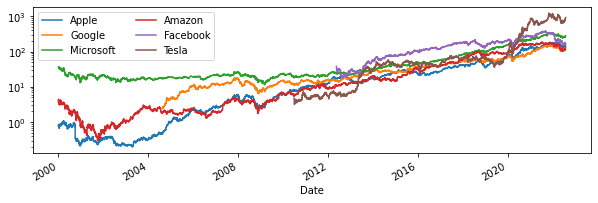

In [53]:
ax = stock_df.plot(logy=True, figsize=(10,3))
ax.legend(["Apple", "Google","Microsoft", "Amazon","Facebook", "Tesla"], loc='best', ncol=2)

# VIDEO 3.4: Split-Apply-Combine

## A Definition
*What is the split-apply-combine framework?*

A procedure to...
1. **split** a DataFrame into subsets of data,
2. **apply** certain functions (sorting, mean, other custom stuff), and
3. **combine** it back into a DataFrame

Application example: compute mean personal income.

## The Process $-$ an Overview

How do we *split* observations by x and *apply* the calculation mean of y?*

<center><img src='https://raw.githubusercontent.com/abjer/sds2017/master/slides/figures/split-apply-combine.png'></center>

## Split-apply-combine in Pandas

A powerful tool in DataFrames is the `groupby` method. Example:

In [54]:
split_var = 'sex' # like x in figure
apply_var = 'total_bill' # like y in figure

tips.groupby(split_var)[apply_var].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

## What is groupby?
`groupby` creats a collection of sub-dataframes we can process.

We can iterate over a groupby object. Example:

In [55]:
results = {}

for group, group_df in tips.groupby('sex'):
      results[group] = group_df.total_bill.mean() 
    
pd.Series(results)

Male      20.744076
Female    18.056897
dtype: float64

## Other Methods and Functions in groupby

Can other methods be applied?

- Yes: `mean`, `std`, `min`, `max` all work. 
- Using `.apply()` method and inserting your ***homemade*** function works too.

## Additional variables groupby
Does `groupby` work for multiple variables, functions?

In [56]:
split_vars = ['sex', 'time'] 
apply_vars = ['total_bill', 'tip']
apply_fcts = ['median', 'mean', 'std']
combined = tips.groupby(split_vars)[apply_vars].agg(apply_fcts)

print(combined.reset_index() )   

      sex    time total_bill                         tip                    
                      median       mean       std median      mean       std
0    Male   Lunch      16.58  18.048485  7.953435   2.31  2.882121  1.329017
1    Male  Dinner      19.63  21.461452  9.460974   3.00  3.144839  1.529116
2  Female   Lunch      13.42  16.339143  7.500803   2.01  2.582857  1.075108
3  Female  Dinner      17.19  19.213077  8.202085   3.00  3.002115  1.193483


Note grouping with multiple variables uses a [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.MultiIndex.html) which we do not cover.

## Maintaining the Structure
*How do we get our `groupby` output into the original dataframe?*

- Option 1: you merge it (be careful!)

- Option 2: you use `transform`.

In [57]:
tips['mu_sex'] = tips.groupby(split_vars)[apply_var].transform('mean')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,mu_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,19.213077
1,10.34,1.66,Male,No,Sun,Dinner,3,21.461452
2,21.01,3.50,Male,No,Sun,Dinner,3,21.461452
3,23.68,3.31,Male,No,Sun,Dinner,2,21.461452
4,24.59,3.61,Female,No,Sun,Dinner,4,19.213077


In [58]:
tips['dev_sex'] = (tips.total_bill - tips.mu_sex)
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,mu_sex,dev_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,19.213077,-2.223077
1,10.34,1.66,Male,No,Sun,Dinner,3,21.461452,-11.121452
2,21.01,3.50,Male,No,Sun,Dinner,3,21.461452,-0.451452
3,23.68,3.31,Male,No,Sun,Dinner,2,21.461452,2.218548
4,24.59,3.61,Female,No,Sun,Dinner,4,19.213077,5.376923


# Video 3.5: Reshaping Data

## Stacking Data (I/II)

A DataFrame can be collapsed into a Series with the **stack** command.

Let's generate a simple example:

In [59]:
df = pd.DataFrame([[1,2],[3,4]],columns=['EU','US'],index=[2000,2010])
df

,EU,US
2000,1,2
2010,3,4


Now, stack the data:

In [60]:
stacked = df.stack() # going from wide to long format 
stacked

2000  EU    1
      US    2
2010  EU    3
      US    4
dtype: int64

## Stacking Data (II/II)

Clearly, the data now comes with **hierarchical indexing**; first year, then region.

If we want, we can just reset the indexing:

In [61]:
stacked = stacked.reset_index()
stacked

,level_0,level_1,0
0,2000,EU,1
1,2000,US,2
2,2010,EU,3
3,2010,US,4


And then do the renaming...

In [62]:
stacked.columns = ['year', 'place', 'some_val']
stacked

,year,place,some_val
0,2000,EU,1
1,2000,US,2
2,2010,EU,3
3,2010,US,4


## To Wide Format

We can easily transform a *long* DataFrame to *wide* with `unstack()`. Consider the example:

In [63]:
stacked_new = df.stack() # going from wide to long format 
stacked_new

2000  EU    1
      US    2
2010  EU    3
      US    4
dtype: int64

And transform to wide using either the first or the second index:

In [64]:
stacked_new.unstack(level=0)

,2000,2010
EU,1,3
US,2,4


In [65]:
stacked_new.unstack(level=1)

,EU,US
2000,1,2
2010,3,4


## More Stuff

Other cool functions include
- `melt` which only stacks certain columns
- `pivot` which allows you to reshape the dataframe like in Excel

Applicability depends on case. Example of `.melt()`:

In [66]:
pd.melt(stacked, id_vars=['year'], value_vars=['place', 'some_val'])

,year,variable,value
0,2000,place,EU
1,2000,place,US
2,2010,place,EU
3,2010,place,US
4,2000,some_val,1
5,2000,some_val,2
6,2010,some_val,3
7,2010,some_val,4
